In [7]:
%matplotlib inline

import h5py
import numpy as np
from matplotlib import pyplot as plt
from data import transforms as T
import torch

In [8]:
%pwd

'/Users/yg/code/github/fastMRI'

In [9]:
def visualize_reconstruction(volume_kspace, slice_index):
    slice_kspace = volume_kspace[slice_index]
    slice_image = T.to_tensor(slice_kspace)
    imgplot = plt.imshow(slice_image, cmap="gray")
    plt.show()

In [10]:
reconst_file = "experiments/neumann/reconstructions/file1002250_v2.h5"
reconst_hf = h5py.File(reconst_file, "r")

In [11]:
# print('Keys:', list(reconst_hf.keys()))
#print('Attrs:', dict(reconst_hf.attrs))

(32, 320, 320)


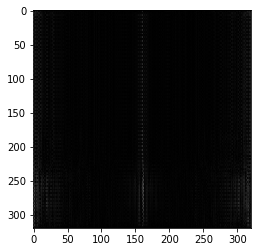

In [12]:
reconst_volume_kspace = reconst_hf['reconstruction'][()]
print(reconst_volume_kspace.shape)
visualize_reconstruction(reconst_volume_kspace, 2)

In [13]:
def visualize_test(volume_kspace, slice_index):
    slice_kspace = volume_kspace[slice_index]
    slice_kspace = T.to_tensor(slice_kspace)
    slice_image = T.ifft2(slice_kspace)           # Apply Inverse Fourier Transform to get the complex image
    slice_image_abs = T.complex_abs(slice_image)
    imgplot = plt.imshow(slice_image_abs, cmap="gray")
    plt.show()

In [17]:
test_file = "/Users/yg/code/github/fastMRI/data/singlecoil_test/file1002250_v2.h5"
test_hf = h5py.File(test_file, "r")
test_hf
print('Keys:', list(test_hf.keys()))
print('Attrs:', dict(test_hf.attrs))

Keys: ['ismrmrd_header', 'kspace', 'mask']
Attrs: {'acceleration': 8, 'num_low_frequency': 24, 'patient_id': 'f2d8279669f43867b4c8d22481438937b0b0af34011a1d7e098c703406cd9502', 'acquisition': 'CORPD_FBK'}


(32, 640, 594)


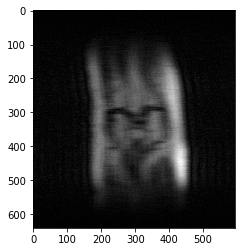

In [18]:
test_volume_kspace = test_hf['kspace'][()]
print(test_volume_kspace.shape)
visualize_test(test_volume_kspace, 21)